# Exploring Dandiset 001275: Mental Navigation in Primate PPC

This Jupyter notebook was AI-generated using dandi-notebook-gen. It hasn't been fully verified, so please exercise caution when interpreting the code or results.

## Overview

This dataset contains neurophysiology data collected from two primates during a mental navigation task. The key techniques involved include multi-electrode extracellular electrophysiology recording and behavioral measurements.

[Explore the Dandiset on NeuroSift](https://neurosift.app/dandiset/001275)

## Notebook Summary

This notebook demonstrates how to load and explore NWB files from the Dandiset, focusing on behavioral data (eye and hand positions) and exploring their patterns over time.

## Required Packages

- pynwb
- h5py
- matplotlib
- remfile

## Loading the Dandiset

Connect to the DANDI archive and access the specified Dandiset to explore its contents.

In [1]:
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001275")
assets = list(dandiset.get_assets())

print(f"Found {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Found 20 assets in the dataset

First 5 assets:
- sub-mahler/sub-mahler_ses-03122021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03172021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03152021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03182021_behavior+ecephys.nwb
- sub-mahler/sub-mahler_ses-03192021_behavior+ecephys.nwb


## Exploring the NWB File

The following demonstrates loading a specific NWB file and examining behavioral data, including eye and hand positions.

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.6.0-alpha because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


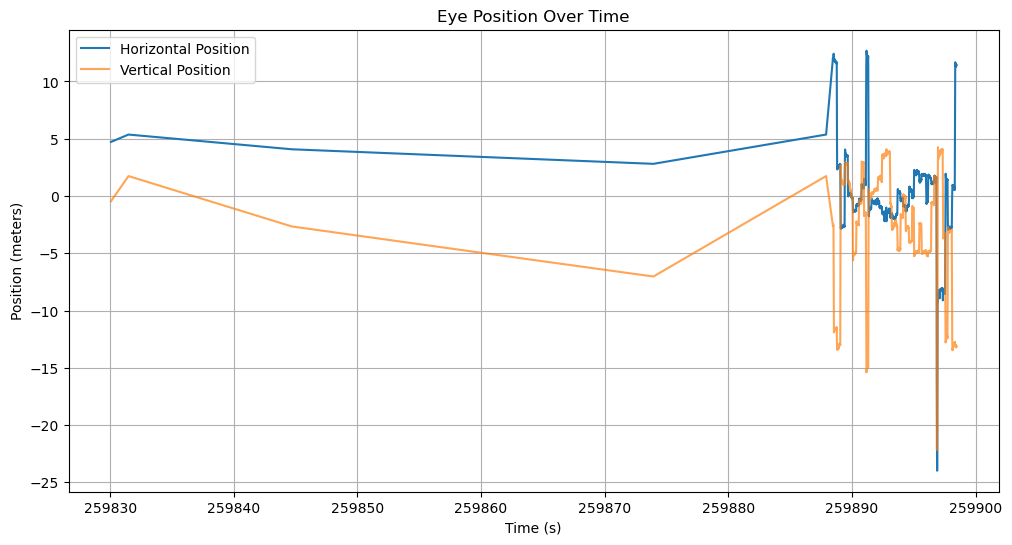

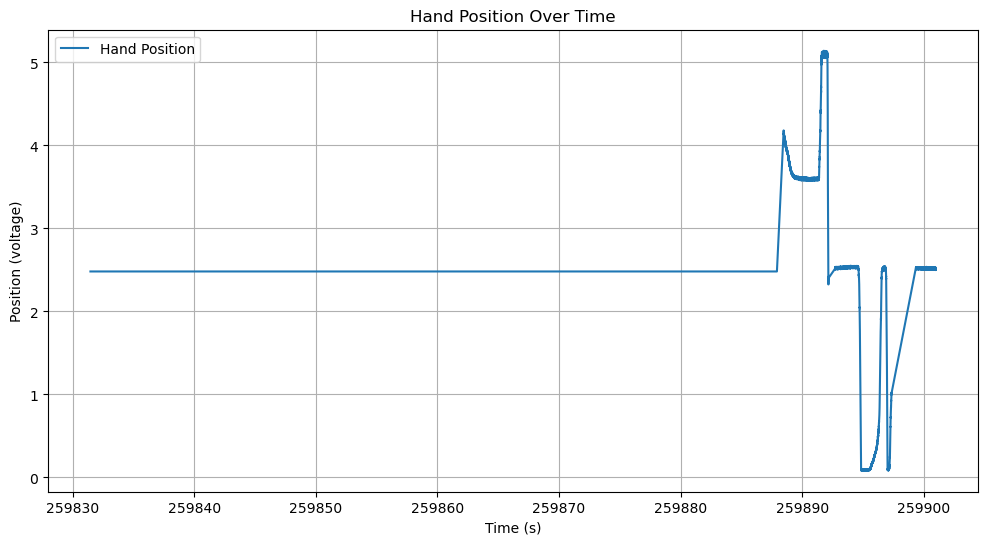

In [2]:
import pynwb
import h5py
import remfile
import matplotlib.pyplot as plt

# Load NWB file remotely
url = "https://api.dandiarchive.org/api/assets/d07034d5-a822-4247-bbd1-97f67921a1d3/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

# Visualize Eye Position Data
eye_position_data = nwb.processing["behavior"].data_interfaces["eye_position"].data[:10000, :]
eye_position_timestamps = nwb.processing["behavior"].data_interfaces["eye_position"].timestamps[:10000]

plt.figure(figsize=(12, 6))
plt.plot(eye_position_timestamps, eye_position_data[:, 0], label='Horizontal Position')
plt.plot(eye_position_timestamps, eye_position_data[:, 1], label='Vertical Position', alpha=0.7)
plt.title('Eye Position Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (meters)')
plt.legend()
plt.grid(True)
plt.show()

# Visualize Hand Position Data
hand_position_data = nwb.processing["behavior"].data_interfaces["hand_position"].data[:10000]
hand_position_timestamps = nwb.processing["behavior"].data_interfaces["hand_position"].timestamps[:10000]

plt.figure(figsize=(12, 6))
plt.plot(hand_position_timestamps, hand_position_data, label='Hand Position')
plt.title('Hand Position Over Time')
plt.xlabel('Time (s)')
plt.ylabel('Position (voltage)')
plt.legend()
plt.grid(True)
plt.show()

## Summary and Future Directions

The exploration of eye and hand position data reveals significant patterns. Users may delve deeper by further analyzing trials and ecephys data, or applying filtering techniques to enhance clarity.